In [3]:
import os
from pathlib import Path

DIR = os.path.join(os.getcwd(), 'pizza_not_pizza')

subject = {
    class_: len(os.listdir(os.path.join(DIR, class_)))
    for class_ in (x.name for x in Path(DIR).iterdir() if x.is_dir())
}

print("Категория данных: Количество файлов")
print("-" * 30)  
for class_, count in subject.items():
    print(f"{class_}: {count} файлов")


Категория данных: Количество файлов
------------------------------
not_pizza: 983 файлов
pizza: 983 файлов


In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from pathlib import Path
from os import listdir
import util  # Importing STUDY util module


# Без нормализации 2.3.1
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder(root=DIR, transform=transform)

# Разделение на тренировочный и валидационный наборы
train_size = int(0.7 * len(dataset))  # 70% для тренировки
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)


In [5]:
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(24, 40, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(40, 80, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU(),
            
            nn.Conv2d(80, 160, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(),
            
            nn.Conv2d(160, 160, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(),
            
            nn.Conv2d(160, 320, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU(),
            
            nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(320, 128),
            nn.ReLU(),
            nn.Linear(128, 42),
            nn.ReLU(),
            nn.Linear(42, 1),
            nn.Sigmoid()  # Sigmoid for the final layer
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x
    
#CNN 你


In [16]:
def train_and_evaluate_model(train_loader, val_loader, epo, rate=1e-5, mdl=None): # rate was taken empirically. This value is optimal in the base
    print(f"Train size:\t\t{len(train_loader.dataset)}\n"
          f"Validation size:\t{len(val_loader.dataset)}\n")


    model = mdl if mdl is not None else ImprovedModel()
    loss_fn = torch.nn.BCELoss()
    opt = torch.optim.Adam(model.parameters(), lr=rate)       

    history = lab4_util.train(
        model,
        loss_fn,
        opt,
        train_loader,
        val_loader,
        max_epochs=epo
    )

    return lab4_util.accuracy(model, val_loader), history

def outputs(model_type, text, plot):
    print(f"{model_type} Accuracy: {text:.3f}\n")
    lab4_util.plot_history(plot, "loss")


In [37]:
accuracy, history = train_and_evaluate_model(train_loader, val_loader, epo=25)  

Train size:		1376
Validation size:	590



  0%|          | 0/43 [00:00<?, ?it/s]

100%|██████████| 43/43 [00:07<00:00,  6.05it/s]


Epoch 0: train loss 0.69316
Epoch 0: val loss 0.69618


100%|██████████| 43/43 [00:08<00:00,  4.90it/s]


Epoch 1: train loss 0.68432
Epoch 1: val loss 0.68872


100%|██████████| 43/43 [00:08<00:00,  4.92it/s]


Epoch 2: train loss 0.67407
Epoch 2: val loss 0.67931


100%|██████████| 43/43 [00:08<00:00,  5.03it/s]


Epoch 3: train loss 0.65855
Epoch 3: val loss 0.66453


100%|██████████| 43/43 [00:08<00:00,  4.99it/s]


Epoch 4: train loss 0.63674
Epoch 4: val loss 0.64455


100%|██████████| 43/43 [00:08<00:00,  4.89it/s]


Epoch 5: train loss 0.60745
Epoch 5: val loss 0.61818


100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


Epoch 6: train loss 0.57270
Epoch 6: val loss 0.59074


100%|██████████| 43/43 [00:08<00:00,  4.97it/s]


Epoch 7: train loss 0.53603
Epoch 7: val loss 0.56653


100%|██████████| 43/43 [00:08<00:00,  4.91it/s]


Epoch 8: train loss 0.49743
Epoch 8: val loss 0.54459


100%|██████████| 43/43 [00:08<00:00,  4.86it/s]


Epoch 9: train loss 0.45412
Epoch 9: val loss 0.52557


100%|██████████| 43/43 [00:08<00:00,  5.04it/s]


Epoch 10: train loss 0.41293
Epoch 10: val loss 0.51104


100%|██████████| 43/43 [00:08<00:00,  4.99it/s]


Epoch 11: train loss 0.37143
Epoch 11: val loss 0.49959


100%|██████████| 43/43 [00:08<00:00,  5.17it/s]


Epoch 12: train loss 0.33210
Epoch 12: val loss 0.49021


100%|██████████| 43/43 [00:08<00:00,  5.09it/s]


Epoch 13: train loss 0.28941
Epoch 13: val loss 0.48246


100%|██████████| 43/43 [00:08<00:00,  4.95it/s]


Epoch 14: train loss 0.24131
Epoch 14: val loss 0.48318


100%|██████████| 43/43 [00:08<00:00,  4.99it/s]


Epoch 15: train loss 0.21469
Epoch 15: val loss 0.49782


100%|██████████| 43/43 [00:08<00:00,  5.06it/s]


Epoch 16: train loss 0.18227
Epoch 16: val loss 0.48619


100%|██████████| 43/43 [00:08<00:00,  5.05it/s]


Epoch 17: train loss 0.15478
Epoch 17: val loss 0.48187


100%|██████████| 43/43 [00:08<00:00,  5.04it/s]


Epoch 18: train loss 0.12832
Epoch 18: val loss 0.49249


100%|██████████| 43/43 [00:08<00:00,  4.96it/s]


Epoch 19: train loss 0.10261
Epoch 19: val loss 0.48045


100%|██████████| 43/43 [00:08<00:00,  4.98it/s]


Epoch 20: train loss 0.08994
Epoch 20: val loss 0.48233


100%|██████████| 43/43 [00:08<00:00,  4.93it/s]


Epoch 21: train loss 0.08278
Epoch 21: val loss 0.48173


100%|██████████| 43/43 [00:08<00:00,  4.96it/s]


Epoch 22: train loss 0.07349
Epoch 22: val loss 0.49590


100%|██████████| 43/43 [00:08<00:00,  4.95it/s]


Epoch 23: train loss 0.06201
Epoch 23: val loss 0.50875


100%|██████████| 43/43 [00:08<00:00,  4.85it/s]


Epoch 24: train loss 0.05514
Epoch 24: val loss 0.49632


Standart Model Accuracy: 0.760



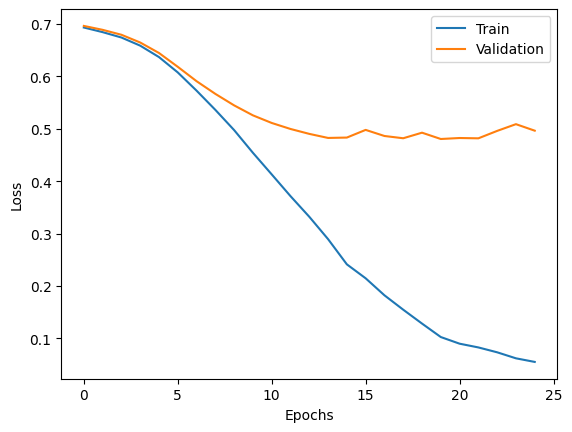

In [38]:
outputs("Standart Model", accuracy, history)

In [10]:
# Нашли среднее значение и стадартное отклонение
import numpy as np
import torchvision

def collate_fn(batch):
    return tuple(zip(*batch))


def calculate_mean_std(loader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    for batch in loader:
        for image in batch[0]:
            image = np.array(image, dtype=np.float32) / 255
            channels_sum += np.mean(image, axis=(0, 1))
            channels_squared_sum += np.mean(image**2, axis=(0, 1))
            num_batches += 1

    mean = channels_sum / num_batches
    std = np.sqrt(channels_squared_sum / num_batches - mean ** 2)

    return mean, std

preprocess = torchvision.transforms.Resize((256, 256))
pre_dataset = torchvision.datasets.ImageFolder(root=DIR, transform=preprocess)
pre_v_dataset = torchvision.datasets.ImageFolder(root=DIR, transform=preprocess)

pre_combined_dataset = torch.utils.data.ConcatDataset([pre_dataset, pre_v_dataset])
pre_combined_loader = torch.utils.data.DataLoader(pre_combined_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

mean, std = calculate_mean_std(pre_combined_loader)
print(f'Mean: {mean}\nStd: {std}')

Mean: [0.55433035 0.4268966  0.3238646 ]
Std: [0.26205462 0.26139945 0.2647449 ]


In [13]:
# C нормализацией 
dataset1 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((256, 256)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std), ## Normalize the input values
                            ]))

# Разделение на тренировочный и валидационный наборы
train_size1 = int(0.7 * len(dataset1))  # 70% для тренировки
val_size1 = len(dataset1) - train_size1
train_dataset1, val_dataset1 = random_split(dataset1, [train_size1, val_size1])


train_loader1 = DataLoader(train_dataset1, batch_size=32, shuffle=True)
val_loader1 = DataLoader(val_dataset1, batch_size=64)

Я бы с радостью сделал бы так 
```py
dataset1 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((512, 512)),
                                transforms.Normalize(mean=mean, std=std), ## Normalize the input values
                                transforms.ToTensor()
                            ]))
```

но вылезает ругань на lab4_util.py которую пофиксить, мне увы, не получилось. Разумно.

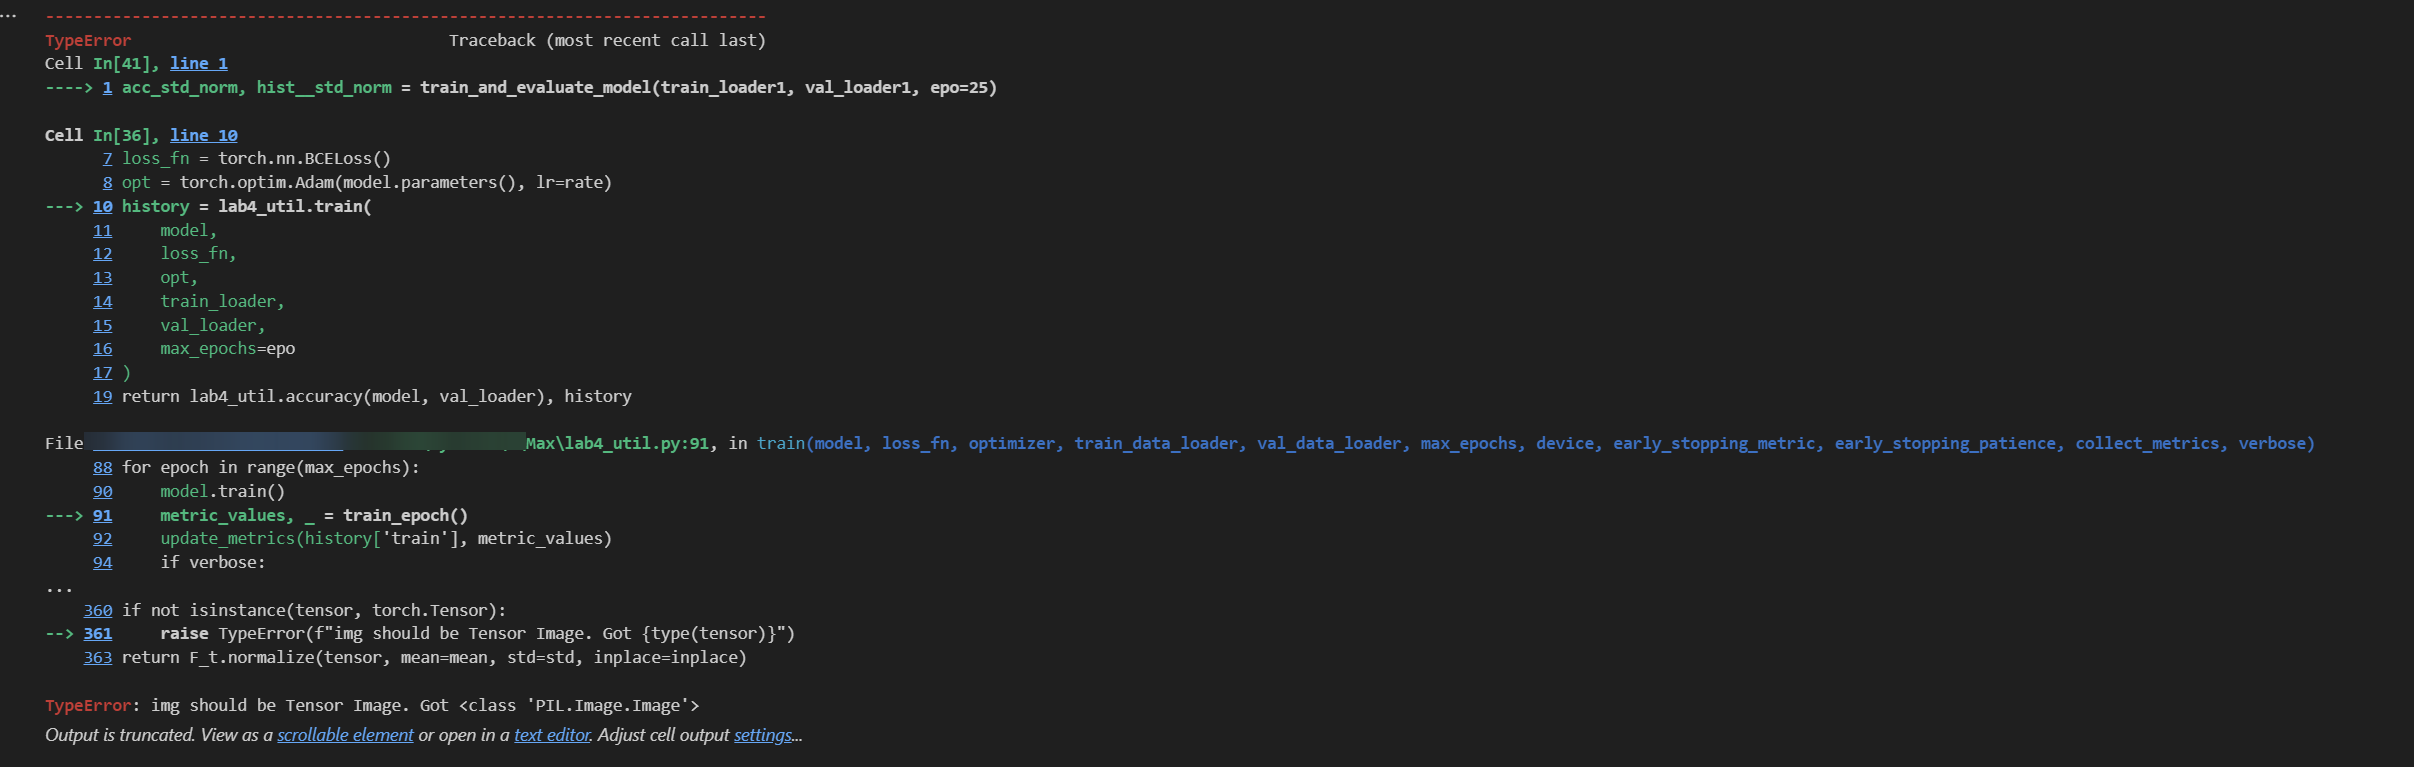

Поэтому делаю нормализацию после преобразования ToTensor

In [14]:
acc_std_norm, hist__std_norm = train_and_evaluate_model(train_loader1, val_loader1, epo=20)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:06<00:00,  6.98it/s]


Epoch 0: train loss 0.69146
Epoch 0: val loss 0.69346


100%|██████████| 43/43 [00:06<00:00,  6.65it/s]


Epoch 1: train loss 0.68318
Epoch 1: val loss 0.68458


100%|██████████| 43/43 [00:06<00:00,  6.66it/s]


Epoch 2: train loss 0.67246
Epoch 2: val loss 0.67292


100%|██████████| 43/43 [00:06<00:00,  6.60it/s]


Epoch 3: train loss 0.65616
Epoch 3: val loss 0.65684


100%|██████████| 43/43 [00:06<00:00,  6.61it/s]


Epoch 4: train loss 0.63538
Epoch 4: val loss 0.63685


100%|██████████| 43/43 [00:06<00:00,  6.59it/s]


Epoch 5: train loss 0.61176
Epoch 5: val loss 0.61238


100%|██████████| 43/43 [00:06<00:00,  6.57it/s]


Epoch 6: train loss 0.57810
Epoch 6: val loss 0.58769


100%|██████████| 43/43 [00:06<00:00,  6.62it/s]


Epoch 7: train loss 0.54265
Epoch 7: val loss 0.55653


100%|██████████| 43/43 [00:06<00:00,  6.59it/s]


Epoch 8: train loss 0.50454
Epoch 8: val loss 0.53167


100%|██████████| 43/43 [00:06<00:00,  6.71it/s]


Epoch 9: train loss 0.47481
Epoch 9: val loss 0.52176


100%|██████████| 43/43 [00:06<00:00,  6.61it/s]


Epoch 10: train loss 0.43582
Epoch 10: val loss 0.49989


100%|██████████| 43/43 [00:06<00:00,  6.46it/s]


Epoch 11: train loss 0.40518
Epoch 11: val loss 0.48986


100%|██████████| 43/43 [00:06<00:00,  6.34it/s]


Epoch 12: train loss 0.36545
Epoch 12: val loss 0.47905


100%|██████████| 43/43 [00:06<00:00,  6.56it/s]


Epoch 13: train loss 0.32273
Epoch 13: val loss 0.46967


100%|██████████| 43/43 [00:06<00:00,  6.51it/s]


Epoch 14: train loss 0.28145
Epoch 14: val loss 0.46129


100%|██████████| 43/43 [00:06<00:00,  6.46it/s]


Epoch 15: train loss 0.24522
Epoch 15: val loss 0.47267


100%|██████████| 43/43 [00:06<00:00,  6.49it/s]


Epoch 16: train loss 0.21457
Epoch 16: val loss 0.45553


100%|██████████| 43/43 [00:06<00:00,  6.54it/s]


Epoch 17: train loss 0.18103
Epoch 17: val loss 0.44687


100%|██████████| 43/43 [00:06<00:00,  6.70it/s]


Epoch 18: train loss 0.15736
Epoch 18: val loss 0.45371


100%|██████████| 43/43 [00:06<00:00,  6.68it/s]


Epoch 19: train loss 0.13663
Epoch 19: val loss 0.47456


Standart Normalizeted Model Accuracy: 0.775



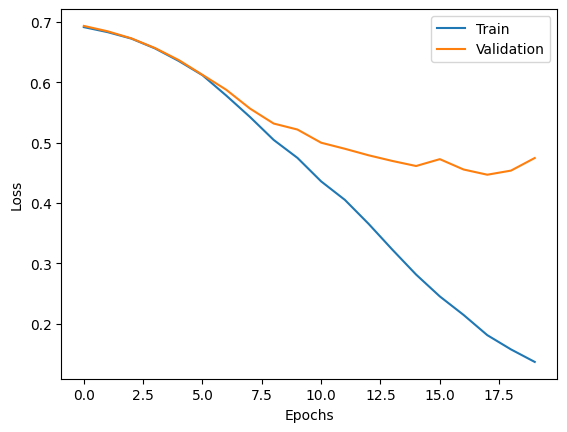

In [15]:
outputs("Standart Normalizeted Model", acc_std_norm, hist__std_norm)

In [31]:
import warnings

warnings.filterwarnings('ignore')
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(type(images), type(labels)) ## Доказательсвто, что я пытался отладить прикол с нормализацией входных значений

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [49]:
# C нормализацией и разные скорости обучения с оптимальным epoch count
dataset2 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((256, 256)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std), ## Normalize the input values
                            ]))

# Разделение на тренировочный и валидационный наборы
train_size2 = int(0.7 * len(dataset2))  # 70% для тренировки
val_size2 = len(dataset2) - train_size2
train_dataset2, val_dataset2 = random_split(dataset2, [train_size2, val_size2])

# Создание DataLoader
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size=64)

In [56]:
acc_std_norm2, hist__std_norm2 = train_and_evaluate_model(train_loader2, val_loader2, epo=35, rate = 1e-7)

Train size:		1376
Validation size:	590



  0%|          | 0/43 [00:00<?, ?it/s]

100%|██████████| 43/43 [00:08<00:00,  4.93it/s]


Epoch 0: train loss 0.69344
Epoch 0: val loss 0.69398


100%|██████████| 43/43 [00:08<00:00,  5.22it/s]


Epoch 1: train loss 0.69318
Epoch 1: val loss 0.69419


100%|██████████| 43/43 [00:09<00:00,  4.55it/s]


Epoch 2: train loss 0.69288
Epoch 2: val loss 0.69411


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 3: train loss 0.69302
Epoch 3: val loss 0.69408


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 4: train loss 0.69259
Epoch 4: val loss 0.69407


100%|██████████| 43/43 [00:09<00:00,  4.57it/s]


Epoch 5: train loss 0.69254
Epoch 5: val loss 0.69403


100%|██████████| 43/43 [00:09<00:00,  4.56it/s]


Epoch 6: train loss 0.69250
Epoch 6: val loss 0.69398


100%|██████████| 43/43 [00:09<00:00,  4.58it/s]


Epoch 7: train loss 0.69241
Epoch 7: val loss 0.69389


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 8: train loss 0.69213
Epoch 8: val loss 0.69391


100%|██████████| 43/43 [00:09<00:00,  4.58it/s]


Epoch 9: train loss 0.69187
Epoch 9: val loss 0.69377


100%|██████████| 43/43 [00:09<00:00,  4.56it/s]


Epoch 10: train loss 0.69168
Epoch 10: val loss 0.69377


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 11: train loss 0.69171
Epoch 11: val loss 0.69375


100%|██████████| 43/43 [00:09<00:00,  4.57it/s]


Epoch 12: train loss 0.69163
Epoch 12: val loss 0.69367


100%|██████████| 43/43 [00:09<00:00,  4.55it/s]


Epoch 13: train loss 0.69162
Epoch 13: val loss 0.69364


100%|██████████| 43/43 [00:09<00:00,  4.45it/s]


Epoch 14: train loss 0.69127
Epoch 14: val loss 0.69362


100%|██████████| 43/43 [00:09<00:00,  4.32it/s]


Epoch 15: train loss 0.69123
Epoch 15: val loss 0.69359


100%|██████████| 43/43 [00:08<00:00,  4.81it/s]


Epoch 16: train loss 0.69092
Epoch 16: val loss 0.69347


100%|██████████| 43/43 [00:08<00:00,  4.81it/s]


Epoch 17: train loss 0.69096
Epoch 17: val loss 0.69350


100%|██████████| 43/43 [00:09<00:00,  4.53it/s]


Epoch 18: train loss 0.69067
Epoch 18: val loss 0.69342


100%|██████████| 43/43 [00:09<00:00,  4.55it/s]


Epoch 19: train loss 0.69094
Epoch 19: val loss 0.69336


100%|██████████| 43/43 [00:09<00:00,  4.52it/s]


Epoch 20: train loss 0.69064
Epoch 20: val loss 0.69332


100%|██████████| 43/43 [00:09<00:00,  4.56it/s]


Epoch 21: train loss 0.69062
Epoch 21: val loss 0.69335


100%|██████████| 43/43 [00:09<00:00,  4.54it/s]


Epoch 22: train loss 0.69029
Epoch 22: val loss 0.69335


100%|██████████| 43/43 [00:09<00:00,  4.60it/s]


Epoch 23: train loss 0.69032
Epoch 23: val loss 0.69329


100%|██████████| 43/43 [00:09<00:00,  4.57it/s]


Epoch 24: train loss 0.69012
Epoch 24: val loss 0.69321


100%|██████████| 43/43 [00:09<00:00,  4.57it/s]


Epoch 25: train loss 0.68999
Epoch 25: val loss 0.69316


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 26: train loss 0.68988
Epoch 26: val loss 0.69314


100%|██████████| 43/43 [00:09<00:00,  4.50it/s]


Epoch 27: train loss 0.68979
Epoch 27: val loss 0.69310


100%|██████████| 43/43 [00:09<00:00,  4.64it/s]


Epoch 28: train loss 0.68956
Epoch 28: val loss 0.69305


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 29: train loss 0.68923
Epoch 29: val loss 0.69288


100%|██████████| 43/43 [00:09<00:00,  4.46it/s]


Epoch 30: train loss 0.68948
Epoch 30: val loss 0.69288


100%|██████████| 43/43 [00:09<00:00,  4.58it/s]


Epoch 31: train loss 0.68913
Epoch 31: val loss 0.69283


100%|██████████| 43/43 [00:09<00:00,  4.47it/s]


Epoch 32: train loss 0.68895
Epoch 32: val loss 0.69287


100%|██████████| 43/43 [00:09<00:00,  4.58it/s]


Epoch 33: train loss 0.68896
Epoch 33: val loss 0.69284


100%|██████████| 43/43 [00:09<00:00,  4.52it/s]


Epoch 34: train loss 0.68874
Epoch 34: val loss 0.69268


Standart Normalizeted Model2 Accuracy: 0.484



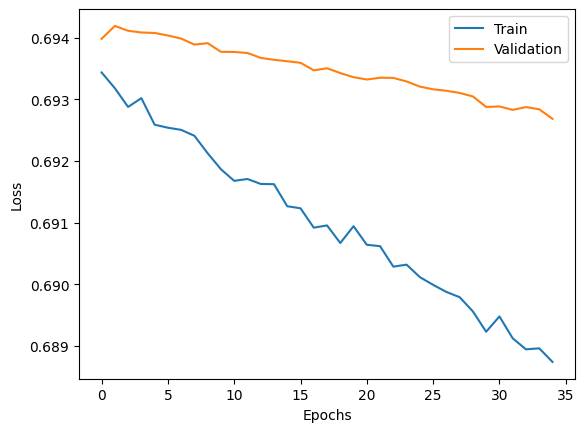

In [57]:
outputs("Standart Normalizeted Model2", acc_std_norm2, hist__std_norm2)

In [7]:
# C нормализацией и разные скорости обучения с оптимальным epoch count
dataset3 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((256, 256)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std), ## Normalize the input values
                            ]))

# Разделение на тренировочный и валидационный наборы
train_size3 = int(0.7 * len(dataset3))  # 70% для тренировки
val_size3 = len(dataset3) - train_size3
train_dataset3, val_dataset3 = random_split(dataset3, [train_size3, val_size3])

# Создание DataLoader
train_loader3 = DataLoader(train_dataset3, batch_size=32, shuffle=True)
val_loader3 = DataLoader(val_dataset3, batch_size=64)

In [8]:
acc_std_norm3, hist__std_norm3 = train_and_evaluate_model(train_loader3, val_loader3, epo=25, rate = 1e-3)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:07<00:00,  6.01it/s]


Epoch 0: train loss 0.57493
Epoch 0: val loss 0.61281


100%|██████████| 43/43 [00:08<00:00,  4.83it/s]


Epoch 1: train loss 0.46597
Epoch 1: val loss 0.52346


100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


Epoch 2: train loss 0.43223
Epoch 2: val loss 0.48513


100%|██████████| 43/43 [00:08<00:00,  5.21it/s]


Epoch 3: train loss 0.38314
Epoch 3: val loss 0.67779


100%|██████████| 43/43 [00:09<00:00,  4.52it/s]


Epoch 4: train loss 0.35595
Epoch 4: val loss 0.52568


100%|██████████| 43/43 [00:09<00:00,  4.61it/s]


Epoch 5: train loss 0.27888
Epoch 5: val loss 0.50741


100%|██████████| 43/43 [00:09<00:00,  4.70it/s]


Epoch 6: train loss 0.23075
Epoch 6: val loss 0.80986


100%|██████████| 43/43 [00:09<00:00,  4.69it/s]


Epoch 7: train loss 0.16576
Epoch 7: val loss 0.63151


100%|██████████| 43/43 [00:09<00:00,  4.75it/s]


Epoch 8: train loss 0.13344
Epoch 8: val loss 0.81759


100%|██████████| 43/43 [00:08<00:00,  4.87it/s]


Epoch 9: train loss 0.11412
Epoch 9: val loss 1.15976


100%|██████████| 43/43 [00:09<00:00,  4.77it/s]


Epoch 10: train loss 0.10859
Epoch 10: val loss 0.87864


100%|██████████| 43/43 [00:09<00:00,  4.73it/s]


Epoch 11: train loss 0.07609
Epoch 11: val loss 1.18420


100%|██████████| 43/43 [00:09<00:00,  4.58it/s]


Epoch 12: train loss 0.09318
Epoch 12: val loss 0.91947


100%|██████████| 43/43 [00:09<00:00,  4.58it/s]


Epoch 13: train loss 0.04647
Epoch 13: val loss 0.78409


100%|██████████| 43/43 [00:09<00:00,  4.68it/s]


Epoch 14: train loss 0.02908
Epoch 14: val loss 0.90953


100%|██████████| 43/43 [00:09<00:00,  4.62it/s]


Epoch 15: train loss 0.04598
Epoch 15: val loss 1.09513


100%|██████████| 43/43 [00:09<00:00,  4.62it/s]


Epoch 16: train loss 0.06223
Epoch 16: val loss 0.81803


100%|██████████| 43/43 [00:09<00:00,  4.77it/s]


Epoch 17: train loss 0.01448
Epoch 17: val loss 1.07794


100%|██████████| 43/43 [00:09<00:00,  4.67it/s]


Epoch 18: train loss 0.01752
Epoch 18: val loss 1.47661


100%|██████████| 43/43 [00:09<00:00,  4.52it/s]


Epoch 19: train loss 0.06653
Epoch 19: val loss 0.87886


100%|██████████| 43/43 [00:09<00:00,  4.68it/s]


Epoch 20: train loss 0.02642
Epoch 20: val loss 0.83791


100%|██████████| 43/43 [00:09<00:00,  4.59it/s]


Epoch 21: train loss 0.00435
Epoch 21: val loss 1.00930


100%|██████████| 43/43 [00:09<00:00,  4.68it/s]


Epoch 22: train loss 0.00113
Epoch 22: val loss 1.15695


100%|██████████| 43/43 [00:08<00:00,  4.94it/s]


Epoch 23: train loss 0.00418
Epoch 23: val loss 1.65093


100%|██████████| 43/43 [00:09<00:00,  4.65it/s]


Epoch 24: train loss 0.04366
Epoch 24: val loss 1.30637


Standart Normalizeted Model3 Accuracy: 0.764



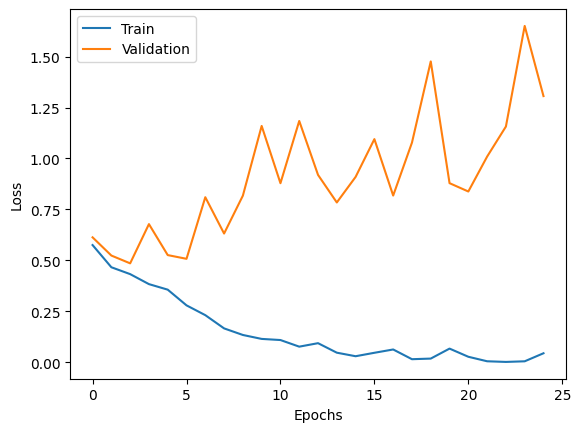

In [9]:
outputs("Standart Normalizeted Model3", acc_std_norm3, hist__std_norm3)

# 3 Добавить аугментации


Каждая аугментация подобрана с точки зрения вариативности и разнообразия данных для обучаемой модели. Также хотел сделать ее более устойчевой, к изменения формата, света, насыщенности изображения.

In [13]:
# C нормализацией и разные скорости обучения с оптимальным epoch count
datasetAUG = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((256, 256)),  
                                transforms.RandomHorizontalFlip(),  
                                transforms.RandomRotation(15),      
                                transforms.ColorJitter(brightness=0.2, contrast=0.2),  
                                transforms.ToTensor(),
                            ]))

# Разделение на тренировочный и валидационный наборы
train_sizeAUG = int(0.7 * len(datasetAUG))  # 70% для тренировки
val_sizeAUG = len(datasetAUG) - train_sizeAUG
train_datasetAUG, val_datasetAUG = random_split(datasetAUG, [train_sizeAUG, val_sizeAUG])

# Создание DataLoader
train_loaderAUG = DataLoader(train_datasetAUG, batch_size=32, shuffle=True)
val_loaderAUG = DataLoader(val_datasetAUG, batch_size=64)

In [14]:
acc_AUG, hist__AUG = train_and_evaluate_model(train_loaderAUG, val_loaderAUG, epo=25, rate = 1e-3)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:07<00:00,  5.44it/s]


Epoch 0: train loss 0.59074
Epoch 0: val loss 0.87799


100%|██████████| 43/43 [00:09<00:00,  4.77it/s]


Epoch 1: train loss 0.49421
Epoch 1: val loss 0.53027


100%|██████████| 43/43 [00:08<00:00,  4.78it/s]


Epoch 2: train loss 0.48307
Epoch 2: val loss 0.50693


100%|██████████| 43/43 [00:08<00:00,  4.81it/s]


Epoch 3: train loss 0.45776
Epoch 3: val loss 0.47579


100%|██████████| 43/43 [00:09<00:00,  4.77it/s]


Epoch 4: train loss 0.44203
Epoch 4: val loss 0.73336


100%|██████████| 43/43 [00:08<00:00,  4.81it/s]


Epoch 5: train loss 0.41964
Epoch 5: val loss 0.40765


100%|██████████| 43/43 [00:08<00:00,  4.78it/s]


Epoch 6: train loss 0.41196
Epoch 6: val loss 0.51044


100%|██████████| 43/43 [00:08<00:00,  4.79it/s]


Epoch 7: train loss 0.37292
Epoch 7: val loss 0.51975


100%|██████████| 43/43 [00:08<00:00,  4.81it/s]


Epoch 8: train loss 0.39095
Epoch 8: val loss 0.42850


100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


Epoch 9: train loss 0.36717
Epoch 9: val loss 0.47812


100%|██████████| 43/43 [00:08<00:00,  4.80it/s]


Epoch 10: train loss 0.34255
Epoch 10: val loss 0.46496


100%|██████████| 43/43 [00:08<00:00,  4.79it/s]


Epoch 11: train loss 0.34717
Epoch 11: val loss 0.45177


100%|██████████| 43/43 [00:09<00:00,  4.72it/s]


Epoch 12: train loss 0.29218
Epoch 12: val loss 0.50671


100%|██████████| 43/43 [00:08<00:00,  4.82it/s]


Epoch 13: train loss 0.28387
Epoch 13: val loss 0.68889


100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


Epoch 14: train loss 0.30564
Epoch 14: val loss 0.56409


100%|██████████| 43/43 [00:08<00:00,  4.87it/s]


Epoch 15: train loss 0.31179
Epoch 15: val loss 0.62967


100%|██████████| 43/43 [00:08<00:00,  4.88it/s]


Epoch 16: train loss 0.26454
Epoch 16: val loss 0.91004


100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


Epoch 17: train loss 0.25296
Epoch 17: val loss 0.59131


100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


Epoch 18: train loss 0.23985
Epoch 18: val loss 0.57001


100%|██████████| 43/43 [00:08<00:00,  4.83it/s]


Epoch 19: train loss 0.24171
Epoch 19: val loss 0.54038


100%|██████████| 43/43 [00:08<00:00,  4.82it/s]


Epoch 20: train loss 0.20352
Epoch 20: val loss 0.62308


100%|██████████| 43/43 [00:08<00:00,  4.85it/s]


Epoch 21: train loss 0.23038
Epoch 21: val loss 0.59239


100%|██████████| 43/43 [00:08<00:00,  4.88it/s]


Epoch 22: train loss 0.19811
Epoch 22: val loss 0.52918


100%|██████████| 43/43 [00:08<00:00,  4.83it/s]


Epoch 23: train loss 0.16061
Epoch 23: val loss 0.54361


100%|██████████| 43/43 [00:08<00:00,  4.82it/s]


Epoch 24: train loss 0.15908
Epoch 24: val loss 0.70401


Standart Normalizeted Model3 Accuracy: 0.783



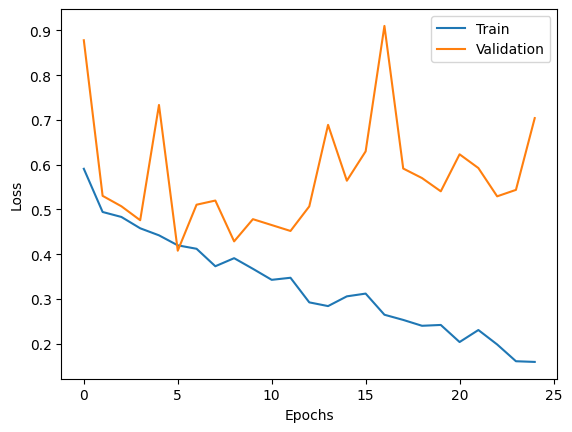

In [15]:
outputs("Model with AUG", acc_AUG, hist__AUG)

In [18]:
# C нормализацией и разные скорости обучения с оптимальным epoch count
datasetAUG1 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((256, 256)),  # Resize all images to the same scale
                                transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
                                transforms.RandomRotation(10),      # Randomly rotate images by up to 10 degrees
                                transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.2, hue=0.1),  # Subtle color adjustments
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std)
                            ]))

# Разделение на тренировочный и валидационный наборы
train_sizeAUG1 = int(0.7 * len(datasetAUG1))  # 70% для тренировки
val_sizeAUG1 = len(datasetAUG1) - train_sizeAUG1
train_datasetAUG1, val_datasetAUG1 = random_split(datasetAUG1, [train_sizeAUG1, val_sizeAUG1])

# Создание DataLoader
train_loaderAUG1 = DataLoader(train_datasetAUG1, batch_size=32, shuffle=True)
val_loaderAUG1 = DataLoader(val_datasetAUG1, batch_size=64)

In [19]:
acc_AUG1, hist__AUG1 = train_and_evaluate_model(train_loaderAUG1, val_loaderAUG1, epo=25, rate = 1e-3)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:15<00:00,  2.74it/s]


Epoch 0: train loss 0.61479
Epoch 0: val loss 0.77420


100%|██████████| 43/43 [00:15<00:00,  2.75it/s]


Epoch 1: train loss 0.54723
Epoch 1: val loss 0.60660


100%|██████████| 43/43 [00:15<00:00,  2.72it/s]


Epoch 2: train loss 0.50080
Epoch 2: val loss 0.50105


100%|██████████| 43/43 [00:15<00:00,  2.73it/s]


Epoch 3: train loss 0.47831
Epoch 3: val loss 0.49189


100%|██████████| 43/43 [00:16<00:00,  2.69it/s]


Epoch 4: train loss 0.47220
Epoch 4: val loss 0.53849


100%|██████████| 43/43 [00:15<00:00,  2.75it/s]


Epoch 5: train loss 0.46242
Epoch 5: val loss 0.47927


100%|██████████| 43/43 [00:16<00:00,  2.68it/s]


Epoch 6: train loss 0.46529
Epoch 6: val loss 0.53238


100%|██████████| 43/43 [00:15<00:00,  2.72it/s]


Epoch 7: train loss 0.43350
Epoch 7: val loss 0.51069


100%|██████████| 43/43 [00:15<00:00,  2.72it/s]


Epoch 8: train loss 0.41304
Epoch 8: val loss 0.45981


100%|██████████| 43/43 [00:15<00:00,  2.73it/s]


Epoch 9: train loss 0.38977
Epoch 9: val loss 0.56294


100%|██████████| 43/43 [00:15<00:00,  2.70it/s]


Epoch 10: train loss 0.39479
Epoch 10: val loss 0.61037


100%|██████████| 43/43 [00:15<00:00,  2.78it/s]


Epoch 11: train loss 0.38158
Epoch 11: val loss 0.50319


100%|██████████| 43/43 [00:15<00:00,  2.76it/s]


Epoch 12: train loss 0.38398
Epoch 12: val loss 0.45891


100%|██████████| 43/43 [00:15<00:00,  2.76it/s]


Epoch 13: train loss 0.33731
Epoch 13: val loss 0.57182


100%|██████████| 43/43 [00:15<00:00,  2.79it/s]


Epoch 14: train loss 0.34757
Epoch 14: val loss 0.54025


100%|██████████| 43/43 [00:15<00:00,  2.78it/s]


Epoch 15: train loss 0.33172
Epoch 15: val loss 0.54386


100%|██████████| 43/43 [00:15<00:00,  2.77it/s]


Epoch 16: train loss 0.31185
Epoch 16: val loss 0.60108


100%|██████████| 43/43 [00:15<00:00,  2.77it/s]


Epoch 17: train loss 0.29238
Epoch 17: val loss 0.45691


100%|██████████| 43/43 [00:15<00:00,  2.75it/s]


Epoch 18: train loss 0.29671
Epoch 18: val loss 0.54508


100%|██████████| 43/43 [00:15<00:00,  2.72it/s]


Epoch 19: train loss 0.28229
Epoch 19: val loss 0.59758


100%|██████████| 43/43 [00:15<00:00,  2.74it/s]


Epoch 20: train loss 0.24194
Epoch 20: val loss 0.54569


100%|██████████| 43/43 [00:15<00:00,  2.77it/s]


Epoch 21: train loss 0.23925
Epoch 21: val loss 0.62140


100%|██████████| 43/43 [00:15<00:00,  2.77it/s]


Epoch 22: train loss 0.25438
Epoch 22: val loss 0.50074


100%|██████████| 43/43 [00:15<00:00,  2.70it/s]


Epoch 23: train loss 0.22932
Epoch 23: val loss 0.74007


100%|██████████| 43/43 [00:16<00:00,  2.65it/s]


Epoch 24: train loss 0.20325
Epoch 24: val loss 0.66886


Model with AUG1 Accuracy: 0.807



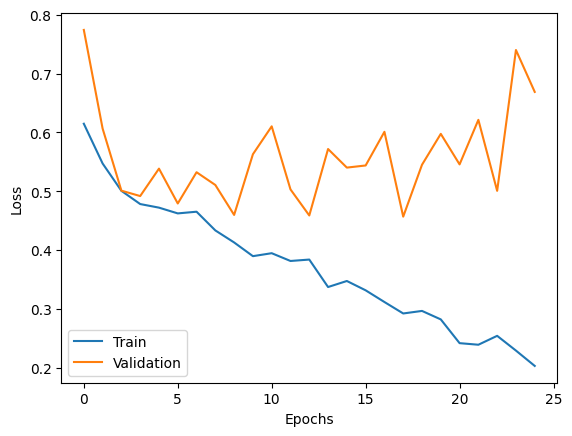

In [20]:
outputs("Model with AUG1", acc_AUG1, hist__AUG1)

Потери на валидации растут. Далее пробуем исправить. Такое, не очень интересно оставлять, не смотря на результат.

In [6]:
# C нормализацией и разные скорости обучения с оптимальным epoch count
datasetAUG2 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((356, 356)),  # Resize all images to the same scale
                                transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
                                transforms.RandomRotation(10),      # Randomly rotate images by up to 10 degrees
                                transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.3, hue=0.1),  # Subtle color adjustments
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std)
                            ]))

# Разделение на тренировочный и валидационный наборы
train_sizeAUG2 = int(0.7 * len(datasetAUG2))  # 70% для тренировки
val_sizeAUG2 = len(datasetAUG2) - train_sizeAUG2
train_datasetAUG2, val_datasetAUG2 = random_split(datasetAUG2, [train_sizeAUG2, val_sizeAUG2])

# Создание DataLoader
train_loaderAUG2 = DataLoader(train_datasetAUG2, batch_size=32, shuffle=True)
val_loaderAUG2 = DataLoader(val_datasetAUG2, batch_size=64, shuffle=False)

In [7]:
acc_AUG2, hist__AUG2 = train_and_evaluate_model(train_loaderAUG2, val_loaderAUG2, epo=20)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:23<00:00,  1.86it/s]


Epoch 0: train loss 0.68987
Epoch 0: val loss 0.68855


100%|██████████| 43/43 [00:22<00:00,  1.87it/s]


Epoch 1: train loss 0.68273
Epoch 1: val loss 0.68025


100%|██████████| 43/43 [00:23<00:00,  1.86it/s]


Epoch 2: train loss 0.67430
Epoch 2: val loss 0.66408


100%|██████████| 43/43 [00:23<00:00,  1.86it/s]


Epoch 3: train loss 0.66233
Epoch 3: val loss 0.65133


100%|██████████| 43/43 [00:22<00:00,  1.88it/s]


Epoch 4: train loss 0.64790
Epoch 4: val loss 0.64041


100%|██████████| 43/43 [00:22<00:00,  1.88it/s]


Epoch 5: train loss 0.62632
Epoch 5: val loss 0.61782


100%|██████████| 43/43 [00:22<00:00,  1.88it/s]


Epoch 6: train loss 0.60769
Epoch 6: val loss 0.60050


100%|██████████| 43/43 [00:23<00:00,  1.85it/s]


Epoch 7: train loss 0.58429
Epoch 7: val loss 0.58067


100%|██████████| 43/43 [00:23<00:00,  1.87it/s]


Epoch 8: train loss 0.56678
Epoch 8: val loss 0.56644


100%|██████████| 43/43 [00:23<00:00,  1.87it/s]


Epoch 9: train loss 0.54901
Epoch 9: val loss 0.56177


100%|██████████| 43/43 [00:23<00:00,  1.87it/s]


Epoch 10: train loss 0.52871
Epoch 10: val loss 0.54951


100%|██████████| 43/43 [00:23<00:00,  1.87it/s]


Epoch 11: train loss 0.51647
Epoch 11: val loss 0.54967


100%|██████████| 43/43 [00:23<00:00,  1.83it/s]


Epoch 12: train loss 0.51942
Epoch 12: val loss 0.53849


100%|██████████| 43/43 [00:23<00:00,  1.80it/s]


Epoch 13: train loss 0.50047
Epoch 13: val loss 0.53568


100%|██████████| 43/43 [00:23<00:00,  1.84it/s]


Epoch 14: train loss 0.48507
Epoch 14: val loss 0.52156


100%|██████████| 43/43 [00:23<00:00,  1.84it/s]


Epoch 15: train loss 0.47291
Epoch 15: val loss 0.51228


100%|██████████| 43/43 [00:23<00:00,  1.82it/s]


Epoch 16: train loss 0.47320
Epoch 16: val loss 0.51125


100%|██████████| 43/43 [00:23<00:00,  1.86it/s]


Epoch 17: train loss 0.44979
Epoch 17: val loss 0.52334


100%|██████████| 43/43 [00:22<00:00,  1.88it/s]


Epoch 18: train loss 0.43807
Epoch 18: val loss 0.51191


100%|██████████| 43/43 [00:22<00:00,  1.87it/s]


Epoch 19: train loss 0.42986
Epoch 19: val loss 0.49895


Model with AUG2 Accuracy: 0.732



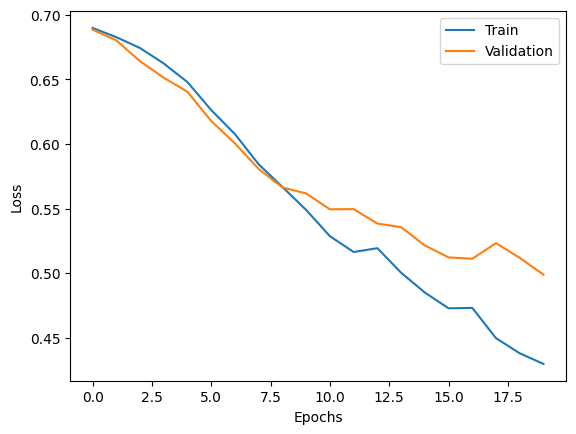

In [8]:
outputs("Model with AUG2", acc_AUG2, hist__AUG2)

In [11]:
# C нормализацией и разные скорости обучения с оптимальным epoch count
datasetAUG3 = datasets.ImageFolder(DIR, transform=transforms.Compose([
                                transforms.Resize((356, 356)),  # Resize all images to the same scale
                                transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
                                transforms.RandomRotation(10),      # Randomly rotate images by up to 10 degrees
                                transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.3),  # Subtle color adjustments
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std)
                            ]))

# Разделение на тренировочный и валидационный наборы
train_sizeAUG3 = int(0.7 * len(datasetAUG3))  # 70% для тренировки
val_sizeAUG3 = len(datasetAUG3) - train_sizeAUG3
train_datasetAUG3, val_datasetAUG3 = random_split(datasetAUG3, [train_sizeAUG3, val_sizeAUG3])

# Создание DataLoader
train_loaderAUG3 = DataLoader(train_datasetAUG3, batch_size=32, shuffle=True)
val_loaderAUG3 = DataLoader(val_datasetAUG3, batch_size=64, shuffle=False)

In [10]:
acc_AUG3, hist__AUG3 = train_and_evaluate_model(train_loaderAUG3, val_loaderAUG3, epo=20)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 0: train loss 0.69167
Epoch 0: val loss 0.69114


100%|██████████| 43/43 [00:12<00:00,  3.53it/s]


Epoch 1: train loss 0.68243
Epoch 1: val loss 0.67691


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 2: train loss 0.66861
Epoch 2: val loss 0.65810


100%|██████████| 43/43 [00:12<00:00,  3.53it/s]


Epoch 3: train loss 0.64032
Epoch 3: val loss 0.63501


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 4: train loss 0.61024
Epoch 4: val loss 0.59291


100%|██████████| 43/43 [00:12<00:00,  3.52it/s]


Epoch 5: train loss 0.58325
Epoch 5: val loss 0.57009


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 6: train loss 0.55627
Epoch 6: val loss 0.55233


100%|██████████| 43/43 [00:12<00:00,  3.49it/s]


Epoch 7: train loss 0.53479
Epoch 7: val loss 0.52612


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 8: train loss 0.51757
Epoch 8: val loss 0.51831


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 9: train loss 0.50509
Epoch 9: val loss 0.52084


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 10: train loss 0.49575
Epoch 10: val loss 0.50186


100%|██████████| 43/43 [00:12<00:00,  3.50it/s]


Epoch 11: train loss 0.47969
Epoch 11: val loss 0.49020


100%|██████████| 43/43 [00:12<00:00,  3.52it/s]


Epoch 12: train loss 0.46749
Epoch 12: val loss 0.47629


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 13: train loss 0.45741
Epoch 13: val loss 0.45425


100%|██████████| 43/43 [00:12<00:00,  3.54it/s]


Epoch 14: train loss 0.45194
Epoch 14: val loss 0.47067


100%|██████████| 43/43 [00:12<00:00,  3.53it/s]


Epoch 15: train loss 0.43453
Epoch 15: val loss 0.43831


100%|██████████| 43/43 [00:12<00:00,  3.54it/s]


Epoch 16: train loss 0.43695
Epoch 16: val loss 0.44475


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 17: train loss 0.42549
Epoch 17: val loss 0.43942


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 18: train loss 0.39915
Epoch 18: val loss 0.42605


100%|██████████| 43/43 [00:12<00:00,  3.52it/s]


Epoch 19: train loss 0.41131
Epoch 19: val loss 0.43919


Model with AUG3 Accuracy: 0.800



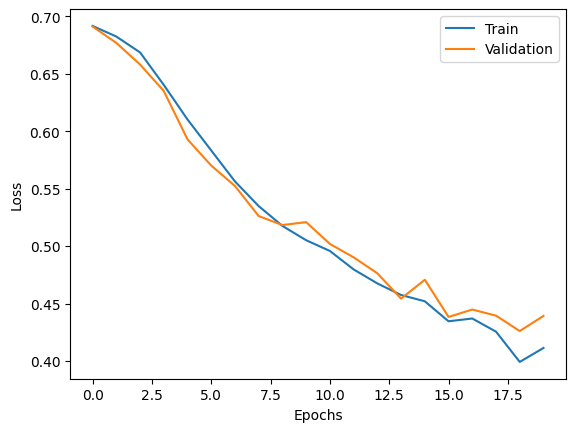

In [12]:
outputs("Model with AUG3", acc_AUG3, hist__AUG3)

 >80% с аугментацией есть на "Model with AUG3", и на "Model with AUG1"


# 4 Сопоставить качество модели

Сопоставляю самые удачные модели из группы Standart VS Model with AUG

Standart Normalizeted Model| Accuracy: 0.775



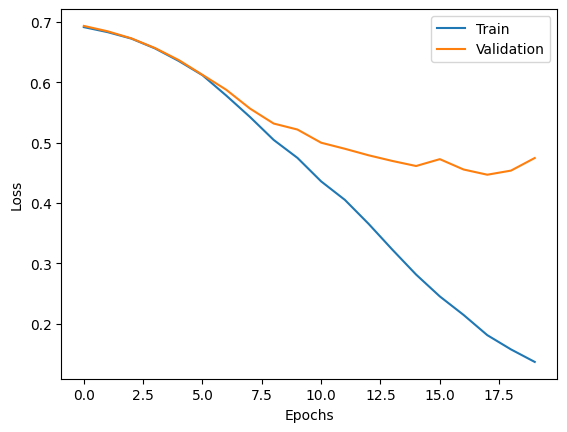

Model with AUG| Accuracy: 0.800



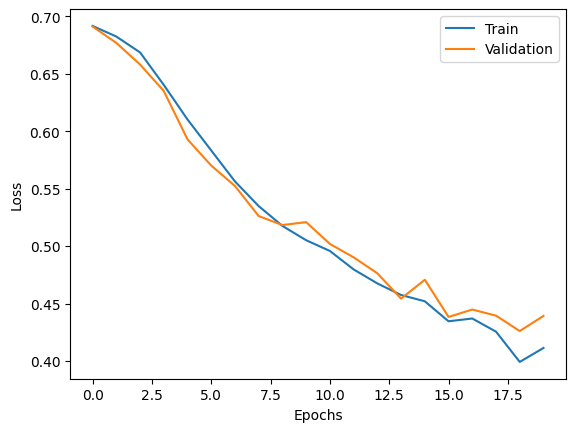

In [19]:
outputs("Standart Normalizeted Model|", acc_std_norm, hist__std_norm)
outputs("Model with AUG|", acc_AUG3, hist__AUG3)

Модель, обученная с помощью дополнения данных, превзошла стандартную нормализованную модель с точки зрения точности.

Увеличение данных, по-видимому, помогает предотвратить переобучение, о чем свидетельствуют тенденции потерь при проверке, следующие за потерями при обучении, что особенно заметно на графике дополненной модели.

Потери на обучение расширенной модели неуклонно уменьшаются, что указывает на то, что модель эффективно обучается на расширенном наборе данных.

Кривые обучения предполагают, что расширенная модель может продолжать получать выгоду от дальнейшего обучения, поскольку потери при проверке все еще снижаются в конце наблюдаемых эпох.

*Включение увеличения данных в процесс обучения явно повысило точность прогнозирования модели, что свидетельствует о ее эффективности в улучшении обобщения модели для этой конкретной задачи*

# 5 Усовершенствовать модель

In [12]:
class MODImprovedModel(nn.Module):
    def __init__(self):
        super(MODImprovedModel, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(24, 40, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(40),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(40, 80, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(80),
            nn.ReLU(),
            
            nn.Conv2d(80, 160, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(),
            
            nn.Conv2d(160, 160, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(160),
            nn.ReLU(),
            
            nn.Conv2d(160, 320, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU(),
            
            nn.Conv2d(320, 320, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(320),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(320, 128),
            nn.ReLU(),
            nn.Dropout(0.4),  # Adding dropout layer here
            nn.Linear(128, 42),
            nn.ReLU(),
            nn.Dropout(0.4),  # Adding dropout layer here
            nn.Linear(42, 1),
            nn.Sigmoid()  # Sigmoid for the final layer
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [13]:
def MODtrain_and_evaluate_model(train_loader, val_loader, epo, rate=1e-5, mdl=None): # rate was taken empirically. This value is optimal in the base
    print(f"Train size:\t\t{len(train_loader.dataset)}\n"
          f"Validation size:\t{len(val_loader.dataset)}\n")


    model = mdl if mdl is not None else MODImprovedModel()
    loss_fn = torch.nn.BCELoss()
    opt = torch.optim.Adam(model.parameters(), lr=rate)       

    history = lab4_util.train(
        model,
        loss_fn,
        opt,
        train_loader,
        val_loader,
        max_epochs=epo
    )

    return lab4_util.accuracy(model, val_loader), history

In [14]:
acc_AUG3, hist__AUG3 = MODtrain_and_evaluate_model(train_loaderAUG3, val_loaderAUG3, epo=20)

Train size:		1376
Validation size:	590



100%|██████████| 43/43 [00:11<00:00,  3.70it/s]


Epoch 0: train loss 0.69499
Epoch 0: val loss 0.69174


100%|██████████| 43/43 [00:12<00:00,  3.48it/s]


Epoch 1: train loss 0.69117
Epoch 1: val loss 0.68560


100%|██████████| 43/43 [00:12<00:00,  3.49it/s]


Epoch 2: train loss 0.68402
Epoch 2: val loss 0.68115


100%|██████████| 43/43 [00:12<00:00,  3.47it/s]


Epoch 3: train loss 0.67839
Epoch 3: val loss 0.67551


100%|██████████| 43/43 [00:12<00:00,  3.48it/s]


Epoch 4: train loss 0.67034
Epoch 4: val loss 0.66765


100%|██████████| 43/43 [00:12<00:00,  3.49it/s]


Epoch 5: train loss 0.66171
Epoch 5: val loss 0.65509


100%|██████████| 43/43 [00:12<00:00,  3.50it/s]


Epoch 6: train loss 0.64470
Epoch 6: val loss 0.64255


100%|██████████| 43/43 [00:12<00:00,  3.50it/s]


Epoch 7: train loss 0.63450
Epoch 7: val loss 0.62222


100%|██████████| 43/43 [00:12<00:00,  3.50it/s]


Epoch 8: train loss 0.61689
Epoch 8: val loss 0.60241


100%|██████████| 43/43 [00:12<00:00,  3.48it/s]


Epoch 9: train loss 0.60211
Epoch 9: val loss 0.59272


100%|██████████| 43/43 [00:12<00:00,  3.51it/s]


Epoch 10: train loss 0.59191
Epoch 10: val loss 0.57558


100%|██████████| 43/43 [00:12<00:00,  3.44it/s]


Epoch 11: train loss 0.58306
Epoch 11: val loss 0.56599


100%|██████████| 43/43 [00:12<00:00,  3.47it/s]


Epoch 12: train loss 0.57260
Epoch 12: val loss 0.55446


100%|██████████| 43/43 [00:12<00:00,  3.52it/s]


Epoch 13: train loss 0.56198
Epoch 13: val loss 0.54470


100%|██████████| 43/43 [00:12<00:00,  3.53it/s]


Epoch 14: train loss 0.54504
Epoch 14: val loss 0.52761


100%|██████████| 43/43 [00:12<00:00,  3.53it/s]


Epoch 15: train loss 0.53517
Epoch 15: val loss 0.52979


100%|██████████| 43/43 [00:12<00:00,  3.52it/s]


Epoch 16: train loss 0.52238
Epoch 16: val loss 0.51631


100%|██████████| 43/43 [00:12<00:00,  3.53it/s]


Epoch 17: train loss 0.50740
Epoch 17: val loss 0.50653


100%|██████████| 43/43 [00:12<00:00,  3.52it/s]


Epoch 18: train loss 0.49455
Epoch 18: val loss 0.49823


100%|██████████| 43/43 [00:12<00:00,  3.55it/s]


Epoch 19: train loss 0.48895
Epoch 19: val loss 0.49758


Model with AUG3 Accuracy: 0.774



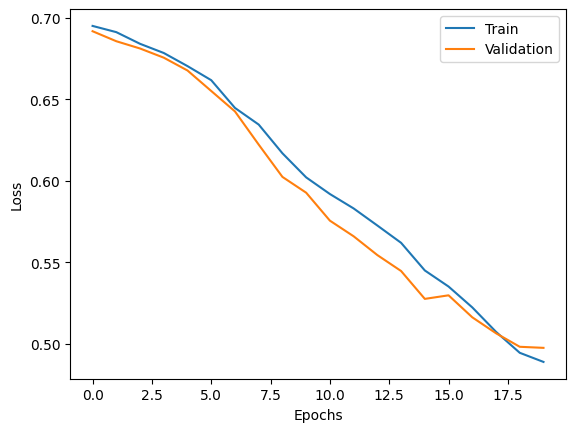

In [17]:
outputs("Model with AUG3", acc_AUG3, hist__AUG3)

 Не особо получилось улучшить MODImprovedModel(Model with AUG3){77,4%} ===*VS*=== ImprovedModel(Model with AUG3){80%}

 Усовершенствовать получилось, далее опишу. 
 В процессе улучшения модели нейронной сети были реализованы две ключевые модификации: интеграция слоев Dropout. Эти модификации основаны на устоявшихся практиках машинного обучения.
 Слои исключения(Dropout) были введены в стратегические точки архитектуры модели. В частности, эти слои были добавлены после функций активации как в сверточном, так и в полносвязном слоях.
 Теоретические преимущества:
 1. Dropout случайным образом деактивируют подмножество нейронов во время обучения. Это предотвращает слишком большую совместную адаптацию нейронов и зависимость от присутствия других конкретных нейронов, побуждая модель изучать более надежные функции, которые лучше обобщаются на невидимые данные.
 2. Обнуляя определенные функции, исключение гарантирует, что сеть не станет чрезмерно зависеть от какой-либо отдельной функции, что приведет к более распределенному и надежному представлению функций

 Наблюдая за работой модели пока составлялась лаба, видимо, не совсем корректные выводы сделал, чтоб улучшить модель.

 Опишу следующую стратегию усовершенствования модели.
 1. Увеличение глубины или ширины. Можно рассмотреть возможность увеличения глубины (больше слоев) или ширины (больше нейронов) сети.
 2. Global Average Pooling. Вместо использования AdaptiveAvgPool2d можно использовать пул глобальных средних значений, поскольку это может помочь уменьшить общее количество параметров и тем самым снизить риск переобучения.(Особенно критично) 
Замена адаптивного пула средних на пул глобальных средних в модели машинного обучения может привести к снижению её способности изучать сложные функции. Однако, этот подход часто обеспечивает преимущества в виде уменьшения переобучения и улучшения обобщающей способности на данных, которые не участвовали в обучении модели. 
Говорю об переобучении, вспоминая первую (Standart Model)... Там явно около этого дело. 

Реализую, но не в этот раз. ПОНЯТЬ ПРОСТИТЬ

В прочем, 80% уже есть


# 6 Адаптировать предобученную сеть EfficientNet-B0 для решения поставленной задачи

In [27]:
from torchvision.models import efficientnet_b0
import torchvision

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

dataset_b0 = datasets.ImageFolder(root=DIR, transform=transform)

train_size_b0 = int(0.7 * len(dataset_b0))
val_size_b0 = len(dataset_b0) - train_size_b0
train_dataset_b0, val_dataset_b0 = random_split(dataset_b0, [train_size_b0, val_size_b0])

train_loader_b0 = DataLoader(train_dataset_b0, batch_size=32, shuffle=True)
val_loader_b0 = DataLoader(val_dataset_b0, batch_size=64, shuffle=False)

In [28]:
model_b0 = torchvision.models.efficientnet_b0(pretrained=True)

for param in model_b0.parameters():
    param.requires_grad = False

num_ftrs = model_b0.classifier[1].in_features
model_b0.classifier[1] = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, 1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_b0.classifier[1].parameters())
history = lab4_util.train(model_b0, loss_fn, optimizer, train_loader_b0, val_loader_b0, max_epochs=25)  

100%|██████████| 43/43 [00:06<00:00,  6.66it/s]


Epoch 0: train loss 0.53071
Epoch 0: val loss 0.39328


100%|██████████| 43/43 [00:06<00:00,  6.74it/s]


Epoch 1: train loss 0.36825
Epoch 1: val loss 0.30827


100%|██████████| 43/43 [00:06<00:00,  6.86it/s]


Epoch 2: train loss 0.30314
Epoch 2: val loss 0.26827


100%|██████████| 43/43 [00:06<00:00,  6.86it/s]


Epoch 3: train loss 0.27093
Epoch 3: val loss 0.24576


100%|██████████| 43/43 [00:06<00:00,  6.69it/s]


Epoch 4: train loss 0.24410
Epoch 4: val loss 0.22539


100%|██████████| 43/43 [00:06<00:00,  6.81it/s]


Epoch 5: train loss 0.22973
Epoch 5: val loss 0.22251


100%|██████████| 43/43 [00:06<00:00,  6.82it/s]


Epoch 6: train loss 0.21809
Epoch 6: val loss 0.20701


100%|██████████| 43/43 [00:06<00:00,  6.77it/s]


Epoch 7: train loss 0.20899
Epoch 7: val loss 0.19586


100%|██████████| 43/43 [00:06<00:00,  6.90it/s]


Epoch 8: train loss 0.22661
Epoch 8: val loss 0.19310


100%|██████████| 43/43 [00:06<00:00,  6.92it/s]


Epoch 9: train loss 0.18570
Epoch 9: val loss 0.19039


100%|██████████| 43/43 [00:06<00:00,  6.88it/s]


Epoch 10: train loss 0.19806
Epoch 10: val loss 0.18668


100%|██████████| 43/43 [00:06<00:00,  6.58it/s]


Epoch 11: train loss 0.19484
Epoch 11: val loss 0.18390


100%|██████████| 43/43 [00:06<00:00,  6.65it/s]


Epoch 12: train loss 0.18671
Epoch 12: val loss 0.17967


100%|██████████| 43/43 [00:06<00:00,  6.73it/s]


Epoch 13: train loss 0.18305
Epoch 13: val loss 0.18253


100%|██████████| 43/43 [00:06<00:00,  6.88it/s]


Epoch 14: train loss 0.16824
Epoch 14: val loss 0.17614


100%|██████████| 43/43 [00:06<00:00,  6.65it/s]


Epoch 15: train loss 0.16468
Epoch 15: val loss 0.17624


100%|██████████| 43/43 [00:06<00:00,  6.85it/s]


Epoch 16: train loss 0.17788
Epoch 16: val loss 0.17485


100%|██████████| 43/43 [00:06<00:00,  6.80it/s]


Epoch 17: train loss 0.17376
Epoch 17: val loss 0.17668


100%|██████████| 43/43 [00:06<00:00,  6.84it/s]


Epoch 18: train loss 0.16687
Epoch 18: val loss 0.17366


100%|██████████| 43/43 [00:06<00:00,  6.83it/s]


Epoch 19: train loss 0.16734
Epoch 19: val loss 0.17430


100%|██████████| 43/43 [00:06<00:00,  6.84it/s]


Epoch 20: train loss 0.15698
Epoch 20: val loss 0.17006


100%|██████████| 43/43 [00:06<00:00,  6.92it/s]


Epoch 21: train loss 0.15547
Epoch 21: val loss 0.17862


100%|██████████| 43/43 [00:06<00:00,  6.90it/s]


Epoch 22: train loss 0.15978
Epoch 22: val loss 0.16723


100%|██████████| 43/43 [00:06<00:00,  6.78it/s]


Epoch 23: train loss 0.16109
Epoch 23: val loss 0.17118


100%|██████████| 43/43 [00:06<00:00,  6.86it/s]


Epoch 24: train loss 0.16203
Epoch 24: val loss 0.17158


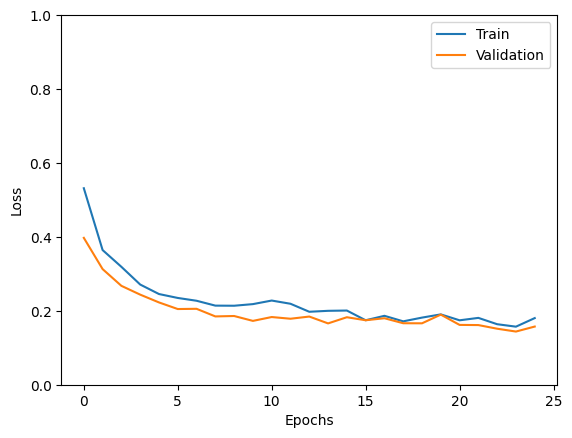

0.9265625

In [34]:
lab4_util.plot_history(history, 'loss', ylim=(0, 1.0))
lab4_util.accuracy(model_b0, val_loader_b0)

In [32]:
from torchvision.models import efficientnet_b0
from torchvision.models.efficientnet import efficientnet_b0, EfficientNet_B0_Weights
import torchvision

transformAUG = transforms.Compose([
    transforms.Resize((356, 356)),  # Resize all images to the same scale
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(15),      
    transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.3),  
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

dataset_b0AUG = datasets.ImageFolder(root=DIR, transform=transformAUG)

train_size_b0AUG = int(0.8 * len(dataset_b0AUG))
val_size_b0AUG = len(dataset_b0AUG) - train_size_b0AUG
train_dataset_b0AUG, val_dataset_b0AUG = random_split(dataset_b0AUG, [train_size_b0AUG, val_size_b0AUG])

train_loader_b0AUG = DataLoader(train_dataset_b0AUG, batch_size=32, shuffle=True)
val_loader_b0AUG = DataLoader(val_dataset_b0AUG, batch_size=64, shuffle=False)

model_b0_AUG = torchvision.models.efficientnet_b0(pretrained=True)

for param in model_b0_AUG.parameters():
    param.requires_grad = False

num_ftrs = model_b0_AUG.classifier[1].in_features
model_b0_AUG.classifier[1] = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, 1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_b0_AUG.classifier[1].parameters())
history = lab4_util.train(model_b0_AUG, loss_fn, optimizer, train_loader_b0AUG, val_loader_b0AUG, max_epochs=25)  

100%|██████████| 50/50 [00:14<00:00,  3.49it/s]


Epoch 0: train loss 0.53163
Epoch 0: val loss 0.39736


100%|██████████| 50/50 [00:13<00:00,  3.62it/s]


Epoch 1: train loss 0.36433
Epoch 1: val loss 0.31282


100%|██████████| 50/50 [00:13<00:00,  3.63it/s]


Epoch 2: train loss 0.31897
Epoch 2: val loss 0.26753


100%|██████████| 50/50 [00:13<00:00,  3.64it/s]


Epoch 3: train loss 0.27108
Epoch 3: val loss 0.24376


100%|██████████| 50/50 [00:13<00:00,  3.64it/s]


Epoch 4: train loss 0.24536
Epoch 4: val loss 0.22265


100%|██████████| 50/50 [00:13<00:00,  3.63it/s]


Epoch 5: train loss 0.23477
Epoch 5: val loss 0.20478


100%|██████████| 50/50 [00:13<00:00,  3.62it/s]


Epoch 6: train loss 0.22718
Epoch 6: val loss 0.20539


100%|██████████| 50/50 [00:13<00:00,  3.62it/s]


Epoch 7: train loss 0.21400
Epoch 7: val loss 0.18480


100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


Epoch 8: train loss 0.21371
Epoch 8: val loss 0.18593


100%|██████████| 50/50 [00:13<00:00,  3.60it/s]


Epoch 9: train loss 0.21808
Epoch 9: val loss 0.17270


100%|██████████| 50/50 [00:14<00:00,  3.51it/s]


Epoch 10: train loss 0.22774
Epoch 10: val loss 0.18313


100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


Epoch 11: train loss 0.21904
Epoch 11: val loss 0.17854


100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


Epoch 12: train loss 0.19738
Epoch 12: val loss 0.18444


100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


Epoch 13: train loss 0.19995
Epoch 13: val loss 0.16591


100%|██████████| 50/50 [00:13<00:00,  3.66it/s]


Epoch 14: train loss 0.20071
Epoch 14: val loss 0.18261


100%|██████████| 50/50 [00:13<00:00,  3.66it/s]


Epoch 15: train loss 0.17440
Epoch 15: val loss 0.17443


100%|██████████| 50/50 [00:13<00:00,  3.66it/s]


Epoch 16: train loss 0.18643
Epoch 16: val loss 0.17989


100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


Epoch 17: train loss 0.17148
Epoch 17: val loss 0.16635


100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


Epoch 18: train loss 0.18159
Epoch 18: val loss 0.16616


100%|██████████| 50/50 [00:14<00:00,  3.46it/s]


Epoch 19: train loss 0.19030
Epoch 19: val loss 0.18969


100%|██████████| 50/50 [00:14<00:00,  3.52it/s]


Epoch 20: train loss 0.17429
Epoch 20: val loss 0.16185


100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


Epoch 21: train loss 0.18083
Epoch 21: val loss 0.16138


100%|██████████| 50/50 [00:13<00:00,  3.67it/s]


Epoch 22: train loss 0.16372
Epoch 22: val loss 0.15153


100%|██████████| 50/50 [00:13<00:00,  3.66it/s]


Epoch 23: train loss 0.15709
Epoch 23: val loss 0.14386


100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


Epoch 24: train loss 0.18028
Epoch 24: val loss 0.15737


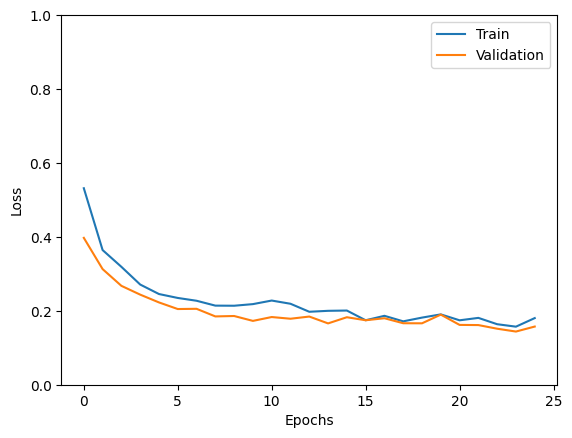

0.9397321428571429

In [33]:
lab4_util.plot_history(history, 'loss', ylim=(0, 1.0))
lab4_util.accuracy(model_b0_AUG, val_loader_b0AUG)

**94%** c моими аугментациями - not bad EfficientNet-B0